In [1]:
import numpy as np
import pandas as pd
import re

# import regex
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from corextopic import corextopic as ct

In [2]:
# !pip install seaborn

In [3]:
import nltk
from nltk.corpus import stopwords

# Reading the Data

In [4]:
# 1. Reading the data
data_df = pd.read_excel(r"processed_data.xlsx")
data_df = data_df.dropna(subset=["Message"])

In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data_df, test_size=0.1)

In [6]:
train

,Message,Reason for Call
4177,im trying find physical therapy doesnt seem pa...,Benefits
13774,im calling order otc shower chair back order n...,OTC
13322,saundoctora mclemore would like place order,OTC
7935,need know insurance numbers,Membership/Enrollment
5419,want talk someone would like talk somone 51388...,No Reason Given
...,...,...
16109,trying place order otc mother sally collins gi...,OTC
15904,need someone call cancellation need know whati...,Membership/Enrollment
6635,want cancel insurance please cancel insurance,Membership/Enrollment
20112,hi sandoctora logan trying find balance otc ca...,OTC


# Data Preprocessing


In [7]:
# 2. Data Preprocessing
stop_words = stopwords.words("english")
stop_words_to_keep = ["not", "no"]
stop_words = list(set(stop_words) - set(stop_words_to_keep))
# custom_stopwords = ['claimid']     #Can I add refund, claim, paid into these
# stop_words.extend(custom_stopwords)

In [8]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer


stop_words = stopwords.words("english")
stop_words_to_keep = ["not", "no"]
stop_words = list(set(stop_words) - set(stop_words_to_keep))


def has_numbers(token):
    return any(char.isdigit() for char in token)


def tokenize_text(book_text):
    """
    Text Tokenization
    input : sentence string
    output : processed string
    """
    TOKEN_PATTERN = r"\s+"
    regex_wt = nltk.RegexpTokenizer(pattern=TOKEN_PATTERN, gaps=True)
    word_tokens = regex_wt.tokenize(book_text)
    return word_tokens


def remove_characters_after_tokenization(tokens):
    """
    Removing characters like single quotes from an sentence
    input : sentence string
    output : processed string
    """
    pattern = re.compile("[{}]".format(re.escape(string.punctuation)))
    filtered_tokens = filter(None, [pattern.sub("", token) for token in tokens])
    return filtered_tokens


def remove_stopwords(tokens):
    """
    removing stop words from a sentence
    input : sentence string
    output : processed string
    """

    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens


def apply_lemmatization(tokens, Ps=WordNetLemmatizer()):
    """
    Applying lemmatization to a sentence
    input : sentence string
    output : processed string
    """
    return [Ps.lemmatize(token) for token in tokens]


def clean_text(text):
    """
    Applying basic cleaning to the text
    input : sentence string
    output : processed string
    """
    text = text.lower()
    #     print(text)
    tokens = tokenize_text(text)
    #     print(tokens)
    tokens = remove_characters_after_tokenization(tokens)

    tokens = remove_stopwords(tokens)
    tokens = apply_lemmatization(tokens)

    text = " ".join([token for token in tokens if not has_numbers(token)])
    return text

In [10]:
train["Message"] = train["Message"].apply(clean_text)

# creating TFIDF VECTORS for the training data

In [11]:
# 3. Feature creation or Feature Engineering
vectorizer = TfidfVectorizer(
    max_features=None, ngram_range=(1, 2), token_pattern="[a-zA-Z0-9&]+"
)
vectorizer = vectorizer.fit(train["Message"])
tfidf_features = vectorizer.transform(train["Message"])
vocab = vectorizer.get_feature_names()
print(len(vocab))

97701


C:\Users\AG84960\AppData\Local\conda\conda\envs\voicemail_final\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [44]:
import pickle

pickle.dump(vocab, open("voicemail_vocab.pkl", "wb"))

# anchor words creation

In [21]:
anchor_words_dict_old = {
    "Claim": [
        "bill",
        "claim",
        "calling claim",
        "calling bill",
        "received bill",
        "got bill",
        "billed",
    ],
    "Benefits": ["benefit", "dental", "vision", "coverage"],
    "Grievance and/or Appeal": [
        "grievance",
        "appeal",
        "complaint",
        "file grievance",
        "filed",
    ],
    "Membership/Enrollment": ["plan", "insurance", "enrollment", "policy", "enrolled"],
    "OTC": ["order", "otc", "otc card", "place otc", "place order"],
    "ID Card": ["card", "id card", "need new", "card need", "new id"],
    "Need Case Management": [
        "case manager",
        "manager",
        "case management",
        "assessment",
        "risk assessment",
    ],
    "EE Benefits": ["extra benefit", "healthy", "healthy benefit"],
    "Authorization": ["authorization", "approved", "approval"],
    "RX/Pharmacy": [
        "rx",
        "pharmacy",
        "prescription",
        "medication",
        "medicine",
        "get prescription",
        "need prescription",
    ],
    "Provider": ["provider", "network", "pcp", "change pcp"],
    "Transportation": [
        "ride",
        "need ride",
        "transportation",
        "need transportation",
        "calling transportation",
        "trip",
        "get transportation",
    ],
    "Nurse Line": ["nurse", "nurse line", "line", "need nurse"],
    "Access to Care": ["appointment", "care", "need help", "need speak"],
    "Monthly Premium": [
        "premium",
        "make payment",
        "premium payment",
        "trying make payment",
    ],
}

In [ ]:
anchor_words_dict = {
    "Claim": [
        "bill",
        "claim",
        "calling claim",
        "calling bill",
        "received bill",
        "got bill",
        "billed",
        "payment denial",
        "service denied",
        "claim",
        "bill",
        "denied coverage",
        "procedure denied",
    ],
    "Benefits": ["benefit", "dental", "vision", "coverage"],
    "Grievance and/or Appeal": [
        "grievance",
        "appeal",
        "complaint",
        "file grievance",
        "filed",
        "dispute",
    ],
    "Membership/Enrollment": [
        "plan",
        "insurance",
        "enrollment",
        "policy",
        "enrolled",
        "disenrolled",
        "new member",
        "(anthem) idcard",
        "cancel plan",
        "cancel insurance",
        "cancel enrollment",
        "Send idcard",
        "sign anthem",
        "address change ,ask plan",
        "change plan",
    ],
    "OTC": [
        "order",
        "otc",
        "otc card",
        "place otc",
        "place order",
        "activate OTC",
        "OTC benefits",
        "Lost OTC card",
        "cancel OTC card",
        "order catalog",
    ],
    "ID Card": ["card", "id card", "need new", "card need", "new id"],
    "Need Case Management": [
        "case manager",
        "manager",
        "case management",
        "assessment",
        "risk assessment",
    ],
    "EE Benefits": ["extra benefit", "healthy", "healthy benefit", "grocery benefits"],
    "Authorization": [
        "authorization",
        "approved",
        "approval",
        "Auth form",
        "Preauthorization",
    ],
    "RX/Pharmacy": [
        "rx",
        "pharmacy",
        "prescription",
        "medication",
        "medicine",
        "get prescription",
        "need prescription",
        "refill prescriptions",
        "Place order",
        "medicine",
        "refill prescription",
    ],
    "Provider": ["provider", "network", "pcp", "change pcp"],
    "Transportation": [
        "ride",
        "need ride",
        "transportation",
        "need transportation",
        "calling transportation",
        "trip",
        "get transportation",
        "Doctor",
        "dentist",
        "doctor plan",
        "doctor area",
        "provider list",
        "Primary care physicians(PCP),Primary care doctor",
        "referral doctor",
        "chiropractor",
        "eye doctor",
        "ear doctor",
        "Psychiatrist",
        "provider directory",
    ],
    "Nurse Line": ["nurse", "nurse line", "line", "need nurse"],
    "Access to Care": [
        "appointment",
        "care",
        "need help",
        "need speak",
        "transportation",
        "need transportation",
        "Ride scheduled",
        "need cab",
        "round trip",
        "pick",
    ],
    "Monthly Premium": [
        "premium",
        "make payment",
        "premium payment",
        "trying make payment",
    ],
}

In [ ]:
# please use below updated dictionary for training
anchor_words_dict_updated = {
    "Claim": [
        "bill",
        "claim",
        "calling claim",
        "calling bill",
        "received bill",
        "got bill",
        "billed",
        "payment denial",
        "service denied",
        "claim",
        "bill",
        "denied coverage",
        "procedure denied",
    ],
    "Benefits": [
        "benefit",
        "dental",
        "vision",
        "coverage",
        "not covered",
        "need to know",
        "benefit statement",
        "inquire about benefits",
        "Calling regarding coverage",
        "Calling regarding services",
        "Calling about benefits",
        "2022 benefits",
        "benefits under my insurance",
        "vison benefits",
        "dental benefits",
        "benefits for next year",
        "international benefits",
    ],
    "Grievance and/or Appeal": [
        "grievance",
        "appeal",
        "complaint",
        "file grievance",
        "filed",
        "dispute",
        "upset",
        "taking so long",
        "called a few times",
        "no one gets back to me",
    ],
    "Membership/Enrollment": [
        "plan",
        "insurance",
        "enrollment",
        "policy",
        "enrolled",
        "disenrolled",
        "new member",
        "(anthem) idcard",
        "cancel plan",
        "cancel insurance",
        "cancel enrollment",
        "Send idcard",
        "sign anthem",
        "address change ,ask plan",
        "change plan",
        "No activePlan",
        "cancel policy",
        "disenroll",
        "original medicare",
    ],
    "OTC": [
        "order",
        "otc",
        "otc card",
        "place otc",
        "place order",
        "activate OTC",
        "OTC benefits",
        "Lost OTC card",
        "cancel OTC",
        "order catalog",
    ],
    "ID Card": ["card", "id card", "need new", "card need", "new id"],
    "Need Case Management": [
        "case manager",
        "manager",
        "case management",
        "assessment",
        "risk assessment",
        "speak",
        "social worker",
        "regarding my case manager",
        "Case worker",
        "case representative",
        "speak representative",
        "case manager",
        "HRA",
        "health risk",
        "risk assessment",
    ],
    "EE Benefits": [
        "extra benefit",
        "healthy",
        "healthy benefit",
        "grocery benefits",
        "Transportation",
        "personal home helpers",
        "Flex cards",
        "Healthy meals",
        "Healthy grocery",
        "healthy pantary",
        "extra benefit" "," "healthy" "," "healthy benefit",
    ],
    "Authorization": [
        "authorization",
        "approved",
        "approval",
        "Auth form",
        "Preauthorization",
        "Check authStatus",
        "Denial authorization",
        "denied authorization",
        "denial letter",
        "why was this denied",
    ],
    "RX/Pharmacy": [
        "rx",
        "pharmacy",
        "prescription",
        "medication",
        "medicine",
        "get prescription",
        "need prescription",
        "refill prescriptions",
        "Place order",
        "medicine",
        "refill prescription",
    ],
    "Provider": [
        "provider",
        "network",
        "pcp",
        "change pcp",
        "Trauma centre",
        "Doctors number",
        "doctor list",
        "Assigned PCP",
        "Calling about Vision",
        "emergency room",
        "primary physician",
        "network provider guide ",
        "provider pharmacy directory",
        "Change PCP",
        "dermatologist in area",
        "dermatologist in network",
        "provider for oral surgery",
        "retna specialist",
        "therapy appointment",
        "neurologist",
        "Urgent care",
        "Change Provider",
        "dental appointment",
        "cardiologist appointment",
        "vision place",
    ],
    "Transportation": [
        "ride",
        "need ride",
        "transportation",
        "need transportation",
        "calling transportation",
        "trip",
        "get transportation",
        "Doctor",
        "dentist",
        "doctor plan",
        "doctor area",
        "provider list",
        "Primary care physicians(PCP)",
        "Primary care doctor",
        "referral doctor",
        "chiropractor",
        "eye doctor",
        "ear doctor",
        "Psychiatrist",
        "provider directory",
    ],
    "Nurse Line": [
        "nurse",
        "nurse line",
        "line",
        "need nurse",
        "need to speak to a nurse",
    ],
    "Access to Care": [
        "appointment",
        "care",
        "need help",
        "need speak",
        "transportation",
        "need transportation",
        "Ride scheduled",
        "need cab",
        "round trip",
        "pick",
        "No access to doctor",
        "Need Help",
        "Appointment",
        "speak to representative",
    ],
    "Monthly Premium": [
        "premium",
        "make payment",
        "premium payment",
        "trying payment",
        "premium payment",
        "pay bill",
        "premium bill",
        "questions premium",
        "premium withholding",
        "missing a payment",
        "auto pay premium",
        "premium question",
        "extra penalty for drugs coverage",
        "premium payment",
        " Make Payment",
        "pay bill",
        " premium bill",
        "questions about premium",
        "premium withholding",
        "missing a payment",
        " auto pay - premium",
        "premium question",
    ],
}

In [13]:
list(anchor_words_dict.keys())

['Claim',
 'Benefits',
 'Grievance and/or Appeal',
 'Membership/Enrollment',
 'OTC',
 'ID Card',
 'Need Case Management',
 'EE Benefits',
 'Authorization',
 'RX/Pharmacy',
 'Provider',
 'Transportation',
 'Nurse Line',
 'Access to Care',
 'Monthly Premium']

In [14]:
for topic in anchor_words_dict:
    for ind in range(len(anchor_words_dict[topic])):

        anchor_words_dict[topic][ind] = clean_text(anchor_words_dict[topic][ind])

In [15]:
list(anchor_words_dict.keys())

['Claim',
 'Benefits',
 'Grievance and/or Appeal',
 'Membership/Enrollment',
 'OTC',
 'ID Card',
 'Need Case Management',
 'EE Benefits',
 'Authorization',
 'RX/Pharmacy',
 'Provider',
 'Transportation',
 'Nurse Line',
 'Access to Care',
 'Monthly Premium']

In [16]:
# To check if a anchor word contains any stop words. We have to handle them if we find any such
def get_anchor_words_with_stopwords():
    anchor_words_with_stopwords = []
    stop_words_set = set(stop_words)
    for topic in anchor_words_dict.keys():
        for key_word in anchor_words_dict[topic]:
            if len(stop_words_set.intersection(set(key_word.split()))) > 0:

                print(
                    stop_words_set.intersection(set(key_word.split())),
                    " exists in ",
                    key_word,
                    topic,
                )
                anchor_words_with_stopwords.append(key_word)

    return anchor_words_with_stopwords


print(get_anchor_words_with_stopwords())

[]


In [17]:
anchor_words = list(anchor_words_dict.values())

# Building the model

In [18]:
# 5. Building the model
def build_model_with_anchor_words(num_of_topics, anchor_words):
    corex_model = ct.Corex(n_hidden=num_of_topics, seed=3)
    corex_model = corex_model.fit(
        tfidf_features,
        words=vocab,
        anchors=anchor_words,  # Pass the anchors in here
        anchor_strength=1000,  # Tell the model how much it should rely on the anchors
    )
    return corex_model

In [11]:
# 5. Building the model without topics
def build_model_with_anchor_words_without_anchor_words(num_of_topics):
    corex_model = ct.Corex(n_hidden=num_of_topics, seed=10)
    corex_model = corex_model.fit(
        tfidf_features,
        words=vocab
        # Pass the anchors in here
        # Tell the model how much it should rely on the anchors
    )
    return corex_model

In [19]:
# Displaying the topics and top words within it
def display_topics_and_words(model, max_n_words):
    for i, topic_ngrams in enumerate(model.get_topics(n_words=max_n_words)):
        topic_ngrams = [ngram[0] for ngram in topic_ngrams if ngram[1] > 0]
        print("Topic #{}: {}".format(i + 1, ", ".join(topic_ngrams)))

In [20]:
corex_model = build_model_with_anchor_words(15, anchor_words)

In [71]:
corex_model_without = build_model_with_anchor_words_without(15)

In [38]:
corex_model.tc

247.5436286638524

In [22]:
corex_model.tc

522.8564035297404

In [41]:
corex_model.tc

522.8564035297404

In [39]:
corex_model.save("corex_final_v2.pkl")

In [86]:
import pickle

In [65]:
with open(r"new_corex.pkl", "wb") as f:
    pickle.dump(corex_model)

# mode = pickle.loads(r'new_corex.pkl')

In [ ]:
[
    "Benefits",
    "Grievance and/or Appeal",
    "Membership/Enrollment",
    "Provider",
    "RX/Pharmacy",
    "Nurse Line",
    "Authorization",
    "Claim",
    "Transportation",
    "OTC",
    "ID Card",
    "Need Case Management",
    "EE Benefits",
    "Access to Care",
    "Monthly Premium",
]

In [23]:
display_topics_and_words(corex_model, max_n_words=8)

Topic #1: bill, claim, calling bill, got bill, calling claim, received bill, billed, payment denial
Topic #2: coverage, dental, benefit, vision, benefit card, otc benefit, vision benefits, dental coverage
Topic #3: grievance, appeal, complaint, file grievance, filed, file, calling grievance, want file
Topic #4: plan, insurance, enrollment, enrolled, cancel plan, disenrolled, new member, cancel insurance
Topic #5: order, otc, place order, otc card, place otc, otc benefits, activate otc, order catalog
Topic #6: card, id card, need new, card need, new id, activate, use, card please
Topic #7: assessment, manager, case manager, risk assessment, case management, case, health risk, risk
Topic #8: healthy, healthy benefit, extra benefit, healthy benefits, benefits, calling healthy, order healthy, healthy meals
Topic #9: approved, authorization, approval, need approval, get authorization, need authorization, prior authorization, pre approval
Topic #10: place order, pharmacy, prescription, medic

In [21]:
# display_topics_and_words(corex_model, max_n_words=8)

In [43]:
corex_model.tc

247.5436286638524

In [24]:
# # 6. Evaluation metrics for identifing optimal number of topics
# # Total Correlation
# # Coherence
def get_total_correlation(corex_model):
    return corex_model.tc


def compute_coherence(documents, corex_model):
    from gensim.models.coherencemodel import CoherenceModel
    from gensim import corpora

    # Creating the term dictionary, where every unique term is assigned an index
    dictionary = corpora.Dictionary(documents)

    # Creating corpus using dictionary prepared above
    corpus = [dictionary.doc2bow(doc) for doc in documents]

    # Get top words for each topic from the trained corex model
    topics = corex_model.get_topics(n_words=100)
    corex_topic_words = [[word for word, tc, sign in topic] for topic in topics]

    # Get coherence score
    cm_corex = CoherenceModel(
        topics=corex_topic_words,
        texts=documents,
        corpus=corpus,
        dictionary=dictionary,
        coherence="c_v",
    )
    coherence_score = cm_corex.get_coherence()
    return coherence_score

In [19]:
# Storing n-gram features that can be used in calculating coherence score
doc_features = vectorizer.inverse_transform(tfidf_features)

In [25]:
### Model prediction / Inference
predictions = corex_model.predict(tfidf_features)
# Selecting the first topic among all other possible topics for the given document
predicted_labels = [
    np.where(pred)[0][0] if len(np.where(pred)[0]) > 0 else -1 for pred in predictions
]

In [63]:
predictions = corex_model.predict(tfidf_features)

In [38]:
predictions = corex_model.predict_proba(tfidf_features)

In [27]:
list(anchor_words_dict.keys())

['Claim',
 'Benefits',
 'Grievance and/or Appeal',
 'Membership/Enrollment',
 'OTC',
 'ID Card',
 'Need Case Management',
 'EE Benefits',
 'Authorization',
 'RX/Pharmacy',
 'Provider',
 'Transportation',
 'Nurse Line',
 'Access to Care',
 'Monthly Premium']

In [28]:
categories = [
    "Claim",
    "Benefits",
    "Grievance and/or Appeal",
    "Membership/Enrollment",
    "OTC",
    "ID Card",
    "Need Case Management",
    "EE Benefits",
    "Authorization",
    "RX/Pharmacy",
    "Provider",
    "Transportation",
    "Nurse Line",
    "Access to Care",
    "Monthly Premium",
]

In [29]:
# Topics to categories mapping
predicted_topics = [
    categories[label] if label >= 0 else "Unknown category"
    for label in predicted_labels
]
# data_df['predicted_category'] = predicted_topics
train["predicted_category"] = predicted_topics

In [45]:
test.to_excel("test.xlsx")

# accuracy and precision calculations

In [1]:
import pandas as pd

In [31]:
df_pred = pd.read_excel("end_Result_train.xlsx")

In [86]:
df_pred

,Unnamed: 0,Message,Reason for Call,Reason for Call list,predicted_category
0,2506,husband needs know otc balance,OTC,[OTC],OTC
1,2712,trying find number lady computer wants? card n...,OTC,[OTC],OTC
2,16862,helloo? hello? need know balance please,OTC,[OTC],Unknown category
3,10024,would like make payment itis due today,Monthly Premium,[Monthly Premium],Monthly Premium
4,20406,carl paulson one two questions someone call back,No Reason Given,[No Reason Given],Unknown category
...,...,...,...,...,...
18158,19926,wanted place order make order closed today yea...,OTC,[OTC],OTC
18159,16059,calling order placed using otc card think paid...,OTC,[OTC],OTC
18160,5854,want get confirmation number recording said fa...,Monthly Premium,[Monthly Premium],Unknown category
18161,11807,yes appointment wednesday clock morning need r...,Transportation,[Transportation],Transportation


In [32]:
def split_the_labels(reason):
    reason = reason.split(";")
    for label in range(len(reason)):
        reason[label] = reason[label].replace("#", "")
        #         reason[label] =reason[label].encode()
        reason[label] = str(reason[label])
    return reason

In [ ]:
def create_list(val):
    if val == "Unknown category":
        val = "No Reason Given"
    #     val = val.encode()
    val = str(val)
    val = val.split(";")
    return val


df_pred["predicted_category_lis"] = df_pred["predicted_category"].apply(create_list)

In [33]:
df_pred["Reason for Call list"] = df_pred["Reason for Call"].apply(split_the_labels)

Found20433images


C:\Users\AG84960\AppData\Local\conda\conda\envs\voicemail_final\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


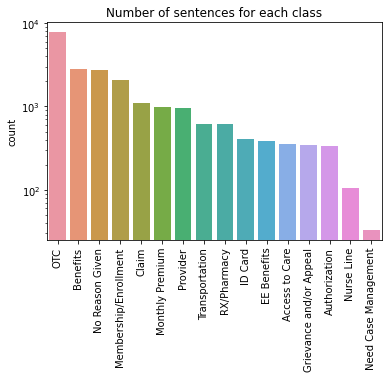

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import ast

meta = pd.DataFrame(df_pred, columns=["Message", "Reason for Call list"])
print("Found{}images".format(len(meta)))
meta.sample(9)
# meta['labels'] = [ast.literal_eval(x) for x in meta['Reason for Call list'].values]
all_labels = [label for lbs in meta["Reason for Call list"] for label in lbs]
labels_count = Counter(all_labels)
ax = sns.countplot(
    all_labels, order=[k for k, _ in labels_count.most_common()], log=True
)
ax.set_title("Number of sentences for each class")
# ax.set_ylim(1E2, 1E4)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

Found22704images


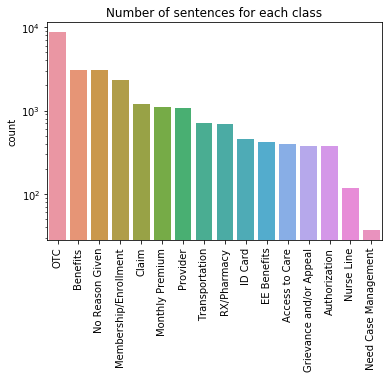

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import ast

meta = pd.DataFrame(df_pred, columns=["Message", "Reason for Call list"])
print("Found{}images".format(len(meta)))
meta.sample(9)
# meta['labels'] = [ast.literal_eval(x) for x in meta['Reason for Call list'].values]
all_labels = [label for lbs in meta["Reason for Call list"] for label in lbs]
labels_count = Counter(all_labels)
ax = sns.countplot(
    all_labels, order=[k for k, _ in labels_count.most_common()], log=True
)
ax.set_title("Number of sentences for each class")
# ax.set_ylim(1E2, 1E4)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [66]:
from platform import python_version

python_version()

'3.8.13'

In [82]:
df_pred["Reason for Call list"][0]

['RX/Pharmacy']

In [93]:
meta["Reason for Call list"].values

array([list(['RX/Pharmacy']), list(['Nurse Line']), list(['ID Card']),
       ..., list(['Membership/Enrollment']), list(['Provider']),
       list(['Benefits'])], dtype=object)

In [100]:
!pip install notebook --upgrade

  Using cached ipython_genutils-0.2.0-py2.py3-none-any.whl (26 kB)
  Using cached defusedxml-0.7.1-py2.py3-none-any.whl (25 kB)
  Using cached mistune-0.8.4-py2.py3-none-any.whl (16 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl (11 kB)
  Using cached backcall-0.2.0-py2.py3-none-any.whl (11 kB)
  Using cached pickleshare-0.7.5-py2.py3-none-any.whl (6.9 kB)
  Using cached colorama-0.4.4-py2.py3-none-any.whl (16 kB)
  Using cached wcwidth-0.2.5-py2.py3-none-any.whl (30 kB)


In [36]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)
a = mlb.fit_transform(df_pred["Reason for Call list"])
y_true = a.toarray()
y_pred = mlb.fit_transform(df_pred["predicted_category_lis"]).toarray()

In [37]:
labels = list(mlb.classes_)

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=labels))

                         precision    recall  f1-score   support

         Access to Care       0.05      0.06      0.06       358
          Authorization       0.59      0.27      0.37       338
               Benefits       0.50      0.13      0.21      2798
                  Claim       0.61      0.56      0.59      1099
            EE Benefits       0.29      0.10      0.15       385
Grievance and/or Appeal       0.61      0.49      0.55       343
                ID Card       0.21      0.75      0.32       409
  Membership/Enrollment       0.55      0.37      0.44      2083
        Monthly Premium       0.96      0.28      0.43       986
   Need Case Management       0.24      0.33      0.28        33
        No Reason Given       0.36      0.88      0.51      2770
             Nurse Line       0.45      0.70      0.55       105
                    OTC       0.97      0.72      0.83      7783
               Provider       0.73      0.27      0.39       968
            RX/Pharmacy 

In [28]:
y_true.c

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [88]:
df_pred

,Unnamed: 0,Message,Reason for Call,Reason for Call list,predicted_category,predicted_category_lis
0,2506,husband needs know otc balance,OTC,[OTC],OTC,[OTC]
1,2712,trying find number lady computer wants? card n...,OTC,[OTC],OTC,[OTC]
2,16862,helloo? hello? need know balance please,OTC,[OTC],Unknown category,[No Reason Given]
3,10024,would like make payment itis due today,Monthly Premium,[Monthly Premium],Monthly Premium,[Monthly Premium]
4,20406,carl paulson one two questions someone call back,No Reason Given,[No Reason Given],Unknown category,[No Reason Given]
...,...,...,...,...,...,...
18158,19926,wanted place order make order closed today yea...,OTC,[OTC],OTC,[OTC]
18159,16059,calling order placed using otc card think paid...,OTC,[OTC],OTC,[OTC]
18160,5854,want get confirmation number recording said fa...,Monthly Premium,[Monthly Premium],Unknown category,[No Reason Given]
18161,11807,yes appointment wednesday clock morning need r...,Transportation,[Transportation],Transportation,[Transportation]


In [43]:
test.to_excel("test.xlsx")

In [ ]:
cor